**The goal is to analyze salary trends based on experience, education, and job role, and build a model to predict salary.**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('C:\\Users\\Acer\\Desktop\\Salary Predictor\\Data\Salary_Data.csv')
df = df.copy()  

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Acer\AppData\Local\Temp\ipykernel_11812\3328032187.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('C:\\Users\\Acer\\Desktop\\Salary Predictor\\Data\Salary_Data.csv')


Check:

- Shape of data

- Column names

- Data types

- Sample records

In [34]:
print(df.shape)
print(df.head())
print(df.info())
print(df.columns)

(6704, 6)
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64

Check:

- Missing values

- Duplicates

- Invalid values

In [35]:
print(df.isnull().sum().sort_values(ascending=False))
print(df.duplicated().sum())
print(df.describe())

Salary                 5
Education Level        3
Years of Experience    3
Age                    2
Gender                 2
Job Title              2
dtype: int64
4912
               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000


In [36]:
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
4884,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
4897,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
4910,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
4923,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
4936,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
...,...,...,...,...,...,...
1305,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0
1236,62.0,Male,PhD,Software Engineer Manager,20.0,200000.0
1304,62.0,Male,PhD,Software Engineer Manager,20.0,200000.0
172,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
duplicate_percent = df.duplicated().mean() * 100
print(f"Exact duplicates: {duplicate_percent:.2f}%")


Exact duplicates: 73.27%


**Drop only rows where all columns are NaN**

In [38]:
df = df.dropna(how='all')
df.shape

(6702, 6)

**Drop rows with any NaN values**

In [39]:
df = df.dropna(how = "any")
df.shape

(6698, 6)

**Checking Outliers**

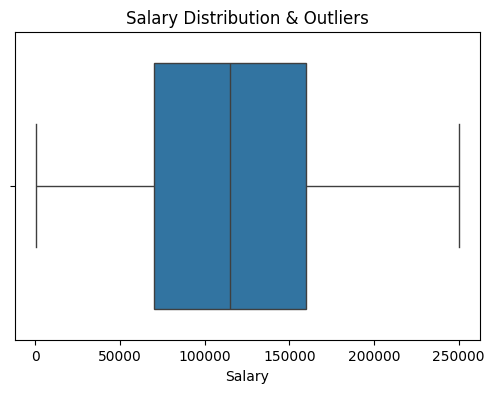

In [40]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Salary'])
plt.title("Salary Distribution & Outliers")
plt.show()


**“Experience vs Age” sanity check**

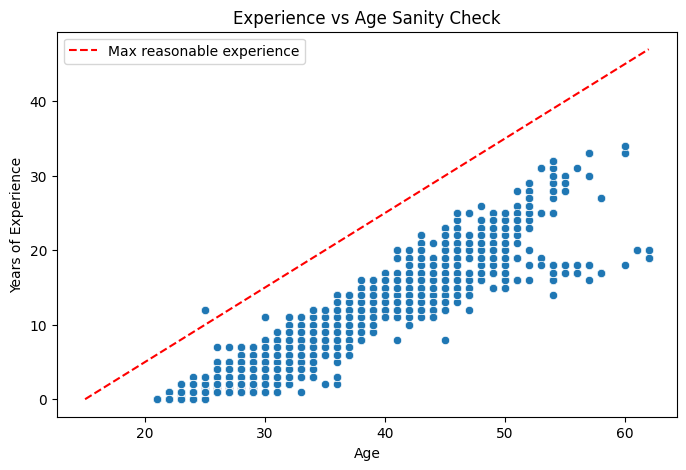

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='Years of Experience')
plt.plot([15, df['Age'].max()], [0, df['Age'].max()-15], color='red', linestyle='--', label='Max reasonable experience')
plt.xlabel('Age')
plt.ylabel('Years of Experience')
plt.title('Experience vs Age Sanity Check')
plt.legend()
plt.show()


In [42]:
# Assuming minimum working age ~15
invalid_exp = df[df['Years of Experience'] > (df['Age'] - 15)]
print(invalid_exp.shape)

(2, 6)


In [43]:
df = df.drop(invalid_exp.index)
df.shape

(6696, 6)

# EDA

**Distribution of Salary**

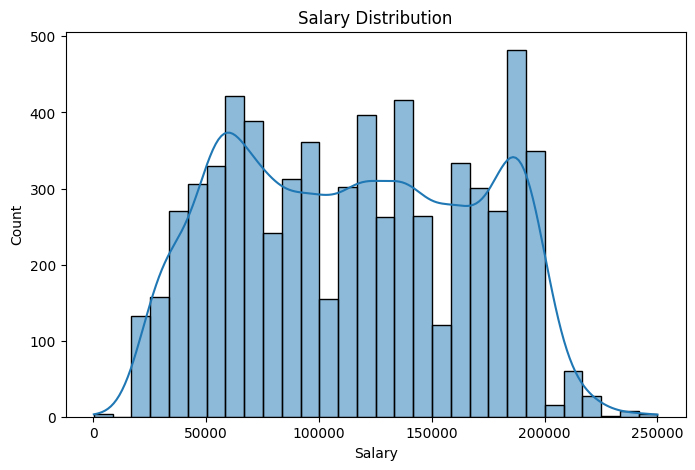

In [44]:
# 1️⃣ Distribution of Salary
plt.figure(figsize=(8,5))
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

**Years of Experience VS Salary**

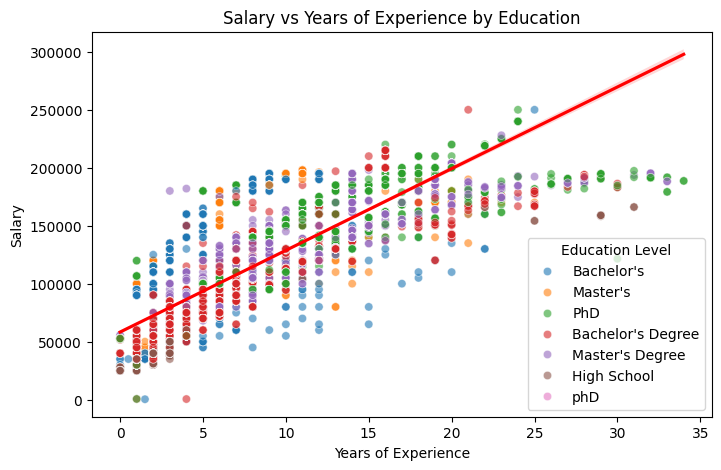

In [45]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Years of Experience', y='Salary', hue='Education Level', alpha=0.6)
sns.regplot(data=df, x='Years of Experience', y='Salary', scatter=False, color='red')
plt.title('Salary vs Years of Experience by Education')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

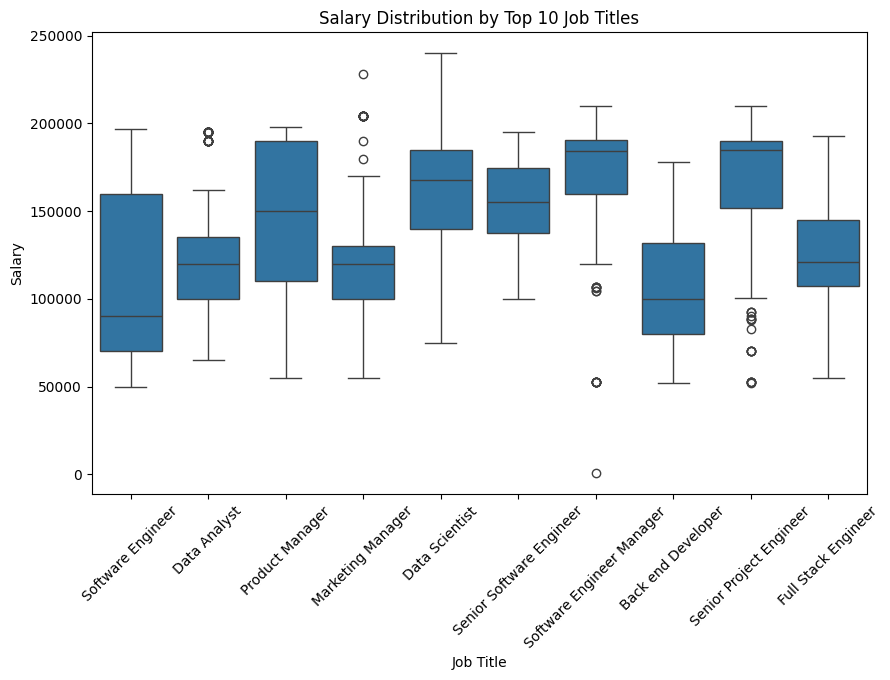

In [46]:
top_jobs = df['Job Title'].value_counts().nlargest(10).index
plt.figure(figsize=(10,6))
sns.boxplot(data=df[df['Job Title'].isin(top_jobs)], x='Job Title', y='Salary')
plt.xticks(rotation=45)
plt.title('Salary Distribution by Top 10 Job Titles')
plt.show()

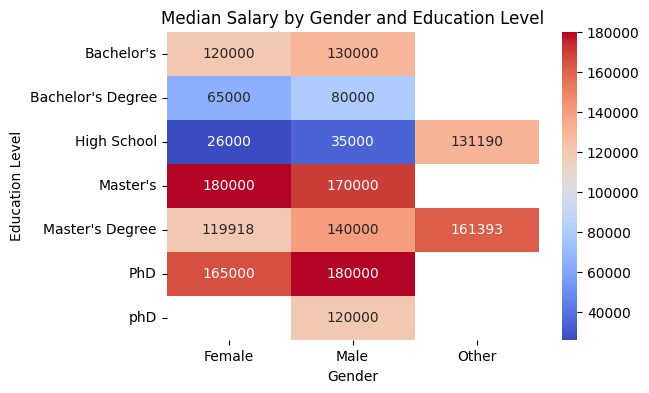

In [47]:
# 4️⃣ Salary by Gender and Education (heatmap)
salary_pivot = df.pivot_table(index='Education Level', columns='Gender', values='Salary', aggfunc='median')
plt.figure(figsize=(6,4))
sns.heatmap(salary_pivot, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Median Salary by Gender and Education Level')
plt.show()

**Correlation Matrix of 'Age','Years of Experience','Salary'**

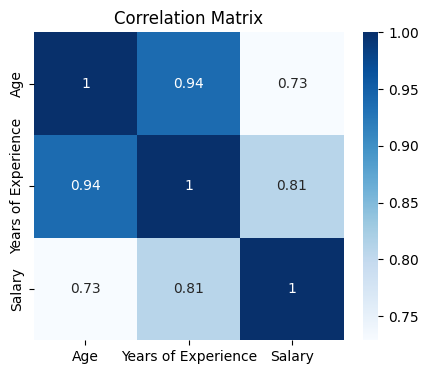

In [48]:
numerical_cols = ['Age','Years of Experience','Salary']
plt.figure(figsize=(5,4))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [49]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [50]:
df['Career_Start_Age'] = df['Age'] - df['Years of Experience']

In [51]:
df['Gender_Encoded'] = df['Gender'].map({'Female':0, 'Male':1 , 'Other':2})


In [52]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Career_Start_Age,Gender_Encoded
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,27.0,1
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,25.0,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,30.0,1
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,29.0,0
4,52.0,Male,Master's,Director,20.0,200000.0,32.0,1
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,29.0,0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,29.0,1
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,26.0,0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,32.0,1


In [53]:
df['Education_Level_Encoded'] = df['Education Level'].map({'High School':0, "Bachelor's":1, "Bachelor's Degree":1.1, "Master's":2, "Master's Degree":2.1, 'PhD':3})

In [54]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Career_Start_Age,Gender_Encoded,Education_Level_Encoded
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,27.0,1,1.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,25.0,0,2.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,30.0,1,3.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,29.0,0,1.0
4,52.0,Male,Master's,Director,20.0,200000.0,32.0,1,2.0
...,...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,29.0,0,3.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,29.0,1,0.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,26.0,0,1.1
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,32.0,1,2.1


In [55]:
df = df.dropna(subset=['Education_Level_Encoded'])


In [56]:
df.isnull().sum()

Age                        0
Gender                     0
Education Level            0
Job Title                  0
Years of Experience        0
Salary                     0
Career_Start_Age           0
Gender_Encoded             0
Education_Level_Encoded    0
dtype: int64

In [59]:
df.shape

(6695, 9)

In [60]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Career_Start_Age,Gender_Encoded,Education_Level_Encoded
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,27.0,1,1.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,25.0,0,2.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,30.0,1,3.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,29.0,0,1.0
4,52.0,Male,Master's,Director,20.0,200000.0,32.0,1,2.0
...,...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,29.0,0,3.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,29.0,1,0.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,26.0,0,1.1
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,32.0,1,2.1


In [61]:
from sklearn.preprocessing import LabelEncoder
le_job = LabelEncoder()
df['Job_Title_Encoded'] = le_job.fit_transform(df['Job Title'])
df

C:\Users\Acer\AppData\Local\Temp\ipykernel_11812\798718900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job_Title_Encoded'] = le_job.fit_transform(df['Job Title'])


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Career_Start_Age,Gender_Encoded,Education_Level_Encoded,Job_Title_Encoded
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,27.0,1,1.0,175
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,25.0,0,2.0,18
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,30.0,1,3.0,144
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,29.0,0,1.0,115
4,52.0,Male,Master's,Director,20.0,200000.0,32.0,1,2.0,25
...,...,...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,29.0,0,3.0,33
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,29.0,1,0.0,115
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,26.0,0,1.1,41
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,32.0,1,2.1,96


In [62]:
# Save to new CSV
df.to_csv('Salary_Data_Cleaned.csv', index=False)

In [63]:
# Save le_job
import joblib
joblib.dump(le_job, 'le_job_encoder.pkl')

['le_job_encoder.pkl']